In [64]:
import csv
import sys
import pandas as pd

csv.field_size_limit(sys.maxsize)

In [65]:
offender_database = []
first_row = 0

with open('Offender.csv', newline='') as csvfile:
    offender_reader = csv.reader(csvfile, delimiter=',')
    for row in offender_reader:
        if first_row == 0:
            print(row)
            first_row = row
            
        else:
            if len(row) > 16:
                row[13] = row[13] + row[14] + row[15]
                row[14] = row[16]
                row.pop() # remove from row array
                row.pop() # remove from row array
            elif len(row) > 15:
                row[13] = row[13] + row[14]
                row[14] = row[15]
                row.pop() # remove from row array
            # if row[12] != "": # removes entries with no ReceptionDate
            offender_database.append(row)

offenderDS = pd.DataFrame(data=offender_database, columns=first_row)
offenderDS['ReceptionDate'] = pd.to_datetime(offenderDS['ReceptionDate'])
offenderDS.ReceptionDate=offenderDS.ReceptionDate.dt.strftime('%Y')

['DocNum', 'LastName', 'FirstName', 'MiddleInit', 'Suffix', 'Race', 'Gender', 'HairColor', 'EyeColor', 'Height', 'Weight', 'DOB', 'ReceptionDate', 'CurrentFacility', 'Status']


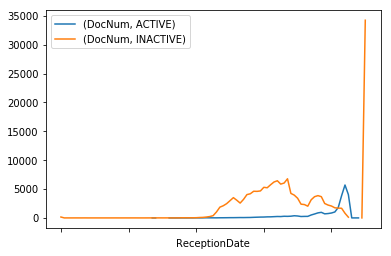

In [66]:
#pt = pd.pivot_table(offenderDS, values=["DocNum"], index=["Status"], aggfunc='count', columns=['ReceptionDate'])
pt = pd.pivot_table(offenderDS, values=["DocNum"], index=["ReceptionDate"], aggfunc="count", columns=["Status"])
pt.plot(kind="line",).legend()

In [79]:
alias_database = []
first_row = 0

with open('OffenderAlias.csv', encoding = "ISO-8859-1") as csvfile:
    offender_reader = csv.reader(csvfile, delimiter=',')
    for row in offender_reader:
        if first_row == 0:
            print(row)
            first_row = row
        else:
            if row[2] == "":
                continue
            if len(row) > 7:
                print(row)
            alias_database.append(row)

aliasDS = pd.DataFrame(data=alias_database, columns=first_row)
aliasDS['DOB'] = pd.to_datetime(aliasDS['DOB'])
aliasDS.DOB=aliasDS.DOB.dt.strftime('%Y')

['Id', 'DOCNum', 'LastName', 'FirstName', 'MiddleInit', 'Suffix', 'DOB']


,Id,DOCNum,LastName,FirstName,MiddleInit,Suffix,DOB
0,483611,62361,Partridge,Carl,J,,1941
1,483612,62361,Partridge,Carl,J,,1941
2,483640,65614,Day,Eddo,,,1938
3,483686,68929,Tyree,Robert,,,1930
4,483725,70716,Hamblin,Whittey,,,1943
5,483748,71418,Craven,Donald,R,,1938
6,483749,71418,Craven,Donald,R,,1946
7,483750,71418,Craven,Donald,R,,1946
8,483751,71418,Craven,Donald,R,,1947
9,483752,71418,Craven,Donald,R,,1949


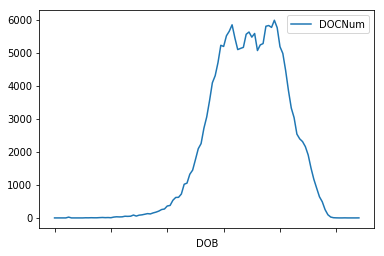

In [82]:
pt = pd.pivot_table(aliasDS, values=["DOCNum"], index=["DOB"], aggfunc="count")
pt.plot(kind="line",).legend()

In [94]:
exit_database = []
first_row = 0

with open('OffenderExit.csv') as csvfile:
    offender_reader = csv.reader(csvfile, delimiter=',')
    for row in offender_reader:
        if first_row == 0:
            print(row)
            first_row = row
        else:
            if len(row) > 3:
                row[2] = row[2] + row[3]
                row.pop()
            elif len(row) > 4:
                print(row)
            exit_database.append(row)

exitDS = pd.DataFrame(data=exit_database, columns=first_row)
exitDS['ExitDate'] = pd.to_datetime(exitDS['ExitDate'])
exitDS.ExitDate=exitDS.ExitDate.dt.strftime('%Y')

['DOCNum', 'ExitDate', 'ExitReason']


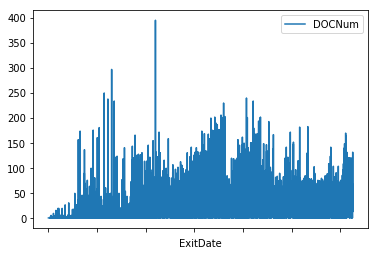

In [95]:
pt = pd.pivot_table(exitDS, values=["DOCNum"], index=["ExitDate"], aggfunc="count")
pt.plot(kind="line",).legend()

In [105]:
reception_database = []
first_row = 0

with open('OffenderReception.csv') as csvfile:
    offender_reader = csv.reader(csvfile, delimiter=',')
    for row in offender_reader:
        if first_row == 0:
            print(row)
            first_row = row
        else:
            if len(row) > 5:
                row[2] = row[2] + row[3] + row[4]
                row[3] = row[5]
                row.pop()
                row.pop()
            elif len(row) > 4:
                row[2] = row[2] + row[3]
                row[3] = row[4]
                row.pop()
            reception_database.append(row)

recepDS = pd.DataFrame(data=reception_database, columns=first_row)
recepDS['MovementDate'] = pd.to_datetime(recepDS['MovementDate'])
recepDS.MovementDate=recepDS.MovementDate.dt.strftime('%Y')

['DocNum', 'MovementDate', 'Reason', 'Facility']


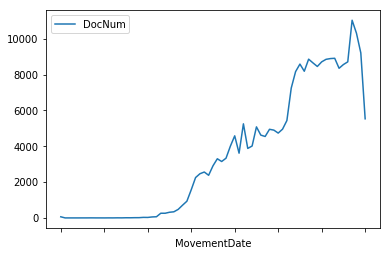

In [109]:
pt = pd.pivot_table(recepDS, values=["DocNum"], index=["MovementDate"], aggfunc="count")
pt.plot(kind="line",).legend()

In [118]:
sentence_database = []
first_row = 0

with open('OffenderSentence.csv', encoding = "ISO-8859-1") as csvfile:
    offender_reader = csv.reader(csvfile, delimiter=',')
    for row in offender_reader:
        if first_row == 0:
            print(row)
            first_row = row
        else:
            sentence_database.append(row)

sentenceDS = pd.DataFrame(data=sentence_database, columns=first_row)
sentenceDS['ConvictDate'] = pd.to_datetime(sentenceDS['ConvictDate'])
sentenceDS.ConvictDate=sentenceDS.ConvictDate.dt.strftime('%Y')

['Id', 'DOCNum', 'OrderID', 'ChargeSeq', 'CRFNum', 'ConvictDate', 'Court', 'StatuteCode', 'OffenceDescription', 'OffenceComment', 'SentenceTermCode', 'Years', 'Months', 'Days', 'SentenceTerm', 'StartDate', 'EndDate', 'CountNum', 'OrderCode', 'ConsecutiveToCount', 'ChargeStatus']


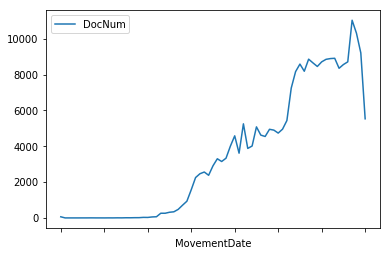

In [119]:
pt = pd.pivot_table(recepDS, values=["DocNum"], index=["MovementDate"], aggfunc="count")
pt.plot(kind="line",).legend()